In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength",'fWidth','fsize','fConc','fCon1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
data =  pd.read_csv("magic04.data",names=cols)

mudei as letra p numeros


In [3]:
data['class'] = (data['class']=="g").astype(int)
# 1 = g and 0 = h

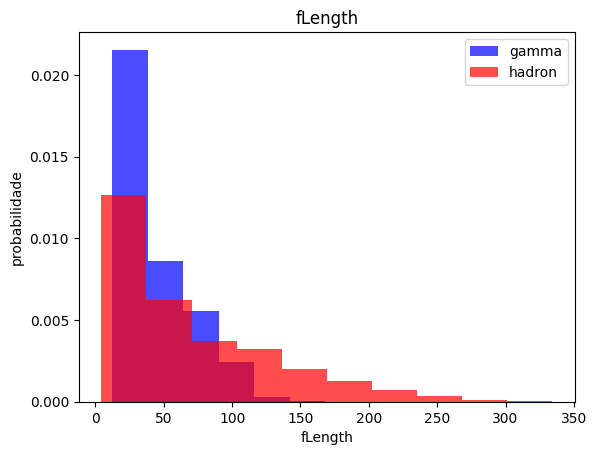

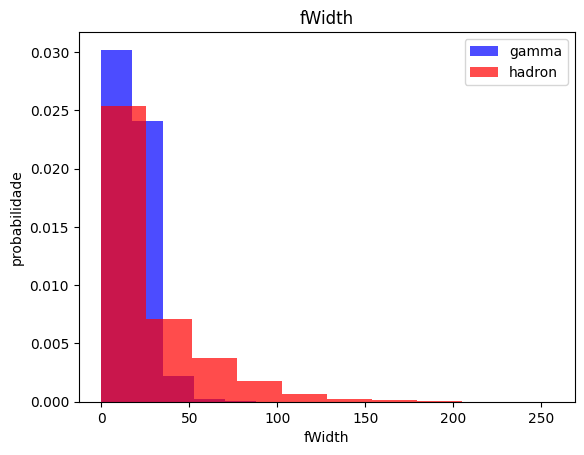

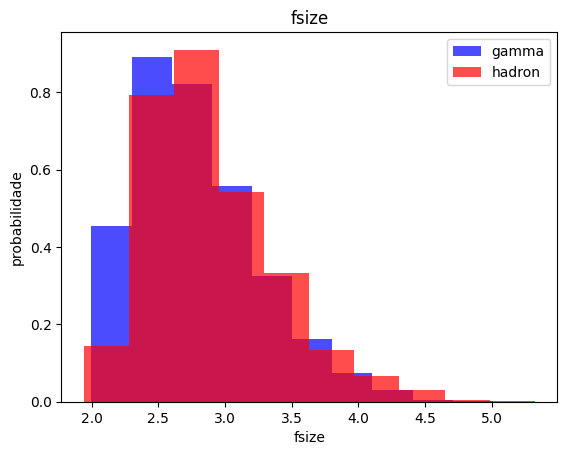

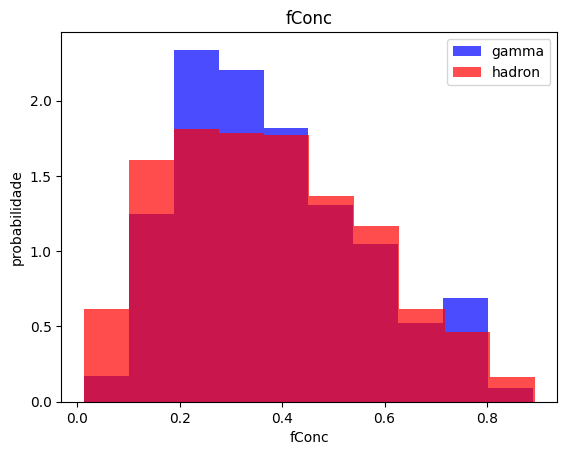

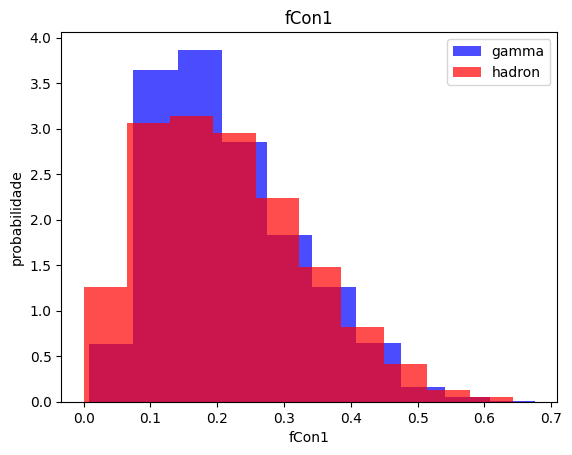

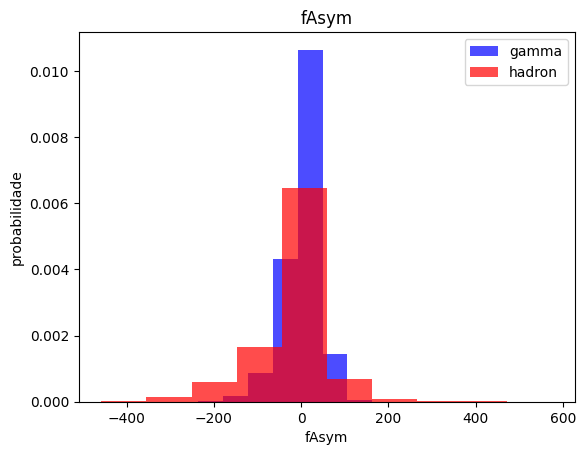

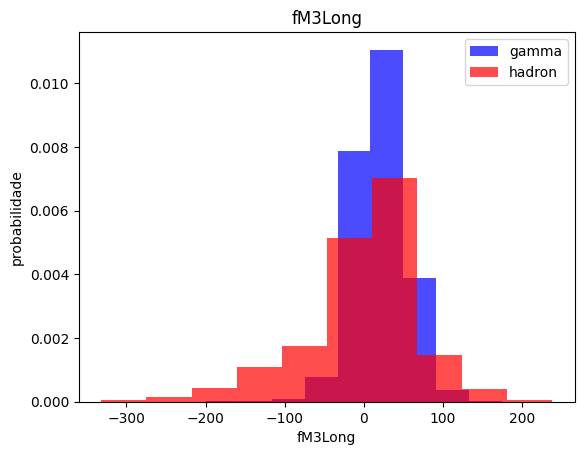

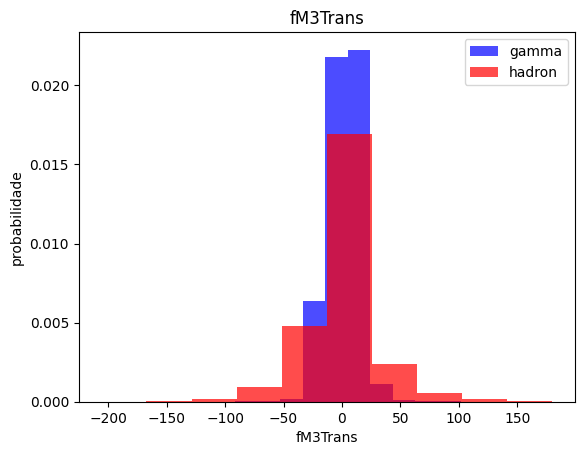

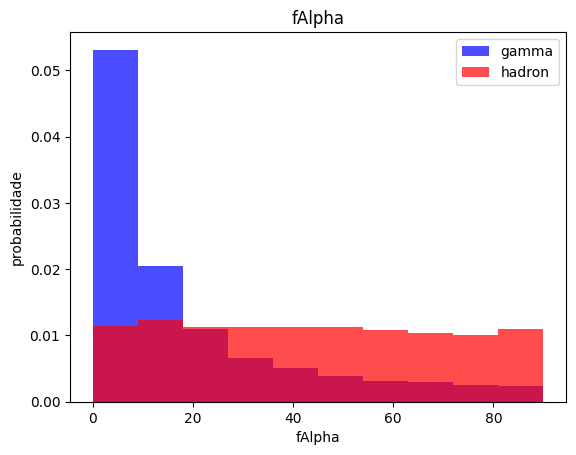

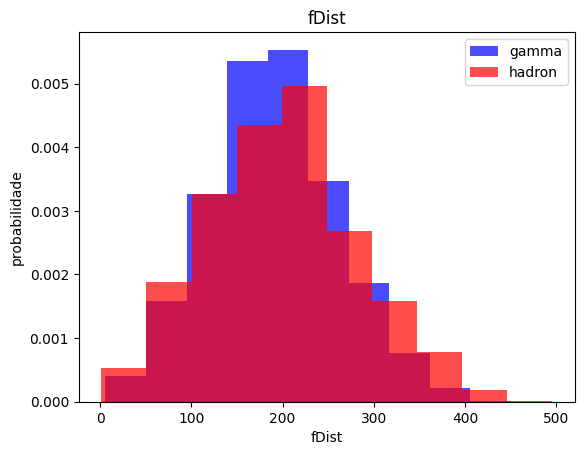

In [4]:
for labels in cols[:-1]:
  plt.hist(data[data['class']==1][labels],color='blue',label='gamma',alpha=0.7, density=True)
  plt.hist(data[data['class']==0][labels],color='red',label='hadron',alpha=0.7, density=True)
  plt.title(labels)
  plt.ylabel('probabilidade')
  plt.xlabel(labels)
  plt.legend()
  plt.show()

#Treino, validaçao, teste


aqui eu separei os dados, 60% p/ treino, 20% p/ validacao e teste

In [5]:
train, valid, test = np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

aqui reescalei alguns numeros, nao entendi muito bem essa parte, porem fez sentido


In [6]:
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler  = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X ,y)

  data = np.hstack((X, np.reshape(y,(-1,1))))
  return data,X,y

In [7]:
train, X_train, Y_Train = scale_dataset(train, oversample=True)
valid,xValid,Yvalid = scale_dataset(valid)
test, xTest,Ytest = scale_dataset(test)

In [8]:
len(Y_Train)

14786

# K vizinhos


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

para esse modelo, defini o numero de vizinhos proximos
e em seguida treinei o modelo


In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_Train)

KNeighborsClassifier()

apos o modelo treinado eu peguei o predict dele (oque ele acha que é)

In [11]:
y_pred = knn_model.predict(xTest)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1337
           1       0.86      0.86      0.86      2467

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



###Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nbModel = GaussianNB()

In [18]:
nbModel=nbModel.fit(X_train,Y_Train)

In [19]:
nbPredict=nbModel.predict(xTest)
nbPredict

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
print(classification_report(Ytest,nbPredict))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49      1337
           1       0.73      0.89      0.80      2467

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



# Log Regression


In [31]:
from sklearn.linear_model import  LogisticRegression
lrModel = LogisticRegression()
lrModel = lrModel.fit(X_train,Y_Train)

lrPredict = lrModel.predict(xTest)

print(classification_report(Ytest, lrPredict))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1337
           1       0.84      0.81      0.83      2467

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM

In [39]:
from  sklearn.svm import SVC

svcModel = SVC()
svcModel = svcModel.fit(X_train,Y_Train)

svcPredict = svcModel.predict(xTest)

print(classification_report(Ytest, svcPredict))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1337
           1       0.89      0.90      0.89      2467

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [37]:
dados = {"Knn":y_pred,
         "NB":nbPredict,
         "LR": lrPredict,
         "svc":svcPredict,
         "yTest":Ytest}
previsoes = pd.DataFrame(dados)

In [38]:
previsoes

,Knn,NB,LR,svc,yTest
0,0,1,1,1,1
1,0,1,0,1,1
2,0,1,1,1,1
3,0,1,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
3799,1,1,1,1,1
3800,1,1,1,1,0
3801,1,1,1,1,1
3802,1,1,0,1,1
